ANALYTICS
TIME  = 1.4430750636460152
Highest Position  = 2.5510204081632644
NUMERIC
TIME  = 1.430000000000001
Highest Position  = 2.515728824543145


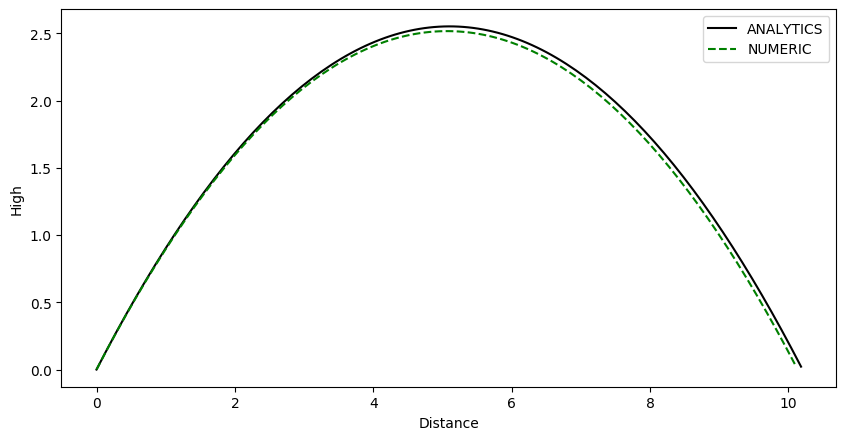

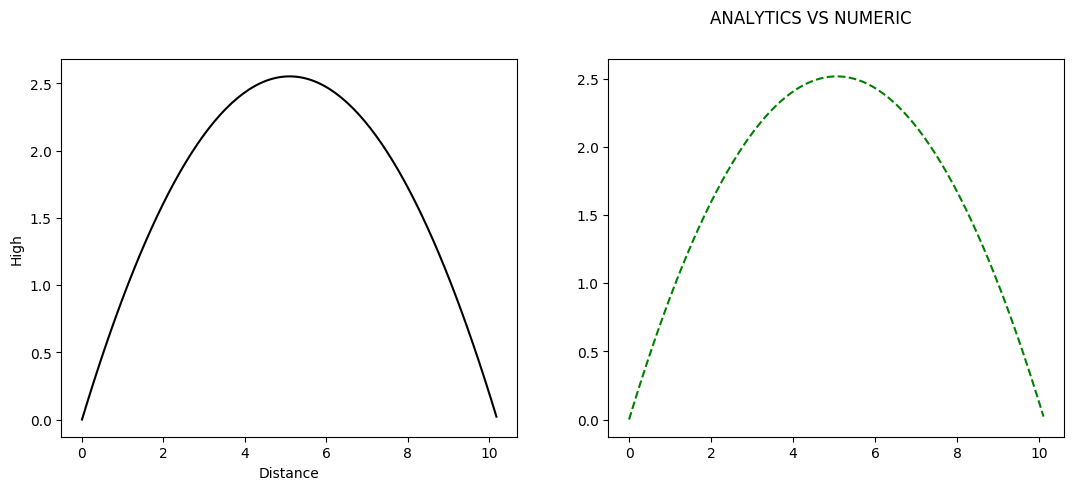

In [102]:
import matplotlib.pyplot as plt
from math import *

TIMESTAMP = 0.01
GRAVITY = -9.8

def clamp(num, min_value, max_value):
   return max(min(num, max_value), min_value)

def PositionAnalytics(vo,t, angle):
  x = (vo * cos(angle)) * t
  y = GRAVITY * t * t / 2 + (vo * sin(angle) * t)
  return [x,y]

def ANALTICS(vo, angle):
  timeTotal = 2 * (vo * sin(angle)) / -GRAVITY
  xMaks = (vo * cos(angle)) * timeTotal
  yMaks = vo*vo * sin(angle) * sin(angle) / (-2*GRAVITY)
  time = 0.0
  positionX = []
  positionY = []
  while(time < timeTotal):
    newPos = PositionAnalytics(vo,time,angle)
    positionX.append(newPos[0])
    positionY.append(newPos[1])
    time = time+TIMESTAMP
    #time =  clamp(time+TIMESTAMP, 0.000, timeTotal)
  
  print("ANALYTICS")
  print("TIME  = {}".format(timeTotal))
  print("Highest Position  = {}".format(yMaks))
  return positionX, positionY

def PositionNumeric(vox, voy,xo,yo):
  v1y = voy + GRAVITY * TIMESTAMP
  x1 = xo + vox * TIMESTAMP
  y1 = yo + v1y * TIMESTAMP
  return x1, y1, v1y

def NUMERIC(vo, angle):
  lastVy = vo * sin(angle)
  lastVx = vo * cos(angle)
  positionX = [0]
  positionY = [0]
  time = 0.0
  yMaks = 0.0

  newX, newY, lastVy = PositionNumeric(lastVx, lastVy,positionX[-1],positionY[-1])
  while(newY > 0):
    time = time + TIMESTAMP
    yMaks = max(yMaks, newY)
    positionX.append(newX)
    positionY.append(newY)
    newX, newY, lastVy = PositionNumeric(lastVx, lastVy,positionX[-1],positionY[-1])
  
  print("NUMERIC")
  print("TIME  = {}".format(time))
  print("Highest Position  = {}".format(yMaks))
  return positionX, positionY

#vo = input()
#angle = input()

vo = 10
angle = 45


AnalticsPosX, AnalticsPosY = ANALTICS(vo,radians(angle))
NumericPosX, NumericPosY = NUMERIC(vo,radians(angle))

#PLOTING AREA
plt.figure(figsize=(10,5), dpi=100)
plt.ylabel("High")
plt.xlabel("Distance")
plt.plot(ylabel="HIGH", xlabel='Distance')
plt.plot(AnalticsPosX,AnalticsPosY, 'k',label='ANALYTICS')
plt.plot(NumericPosX, NumericPosY,'g--',label='NUMERIC')
plt.legend()
plt.show()

#Ploting Manual

plt.figure(figsize=(20,5), dpi=100)
plt.subplot(131)
plt.ylabel("High")
plt.xlabel("Distance")
plt.plot(AnalticsPosX,AnalticsPosY, 'k')
plt.subplot(132)
plt.plot(NumericPosX, NumericPosY,'g--',)
plt.suptitle('ANALYTICS VS NUMERIC')
plt.show()